Epoch: 100%|██████████| 100/100 [00:01<00:00, 96.47it/s]


<Axes: >

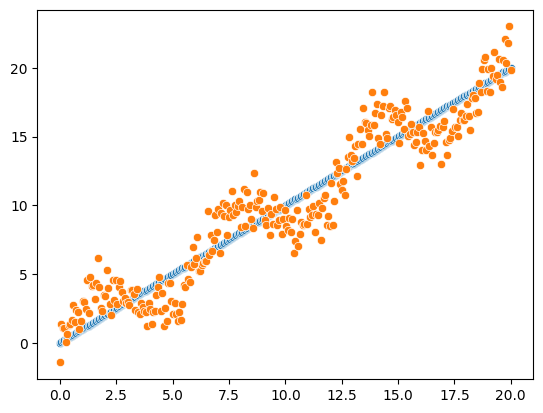

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

for i in tqdm(range(100),desc="Epoch"):
    time.sleep(0.01)
X=np.linspace(start=0,stop=20,num=300)

Y=X + 2*np.sin(X) + np.random.normal(size=X.shape[0])
sns.scatterplot(x=X,y=X)
sns.scatterplot(x=X,y=Y)

In [ ]:
class Simple1DRegressionDataSet(Dataset):
    def __init__(self,X,y):
        super().__init__()
        self.X=X.reshape(-1,1)
        self.y=y.reshape(-1,1)
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32),torch.tensor(self.y[index,:],dtype=torch.float32)
dt= Simple1DRegressionDataSet(X,Y) 
print(dt[0])           
training_loader=DataLoader(dataset=dt, shuffle=True)  
  


(tensor([0.]), tensor([-1.4163]))


## Neural Training with SGD optimizer

Train Batch: 100%|██████████| 30/30 [00:01<00:00, 18.44it/s]


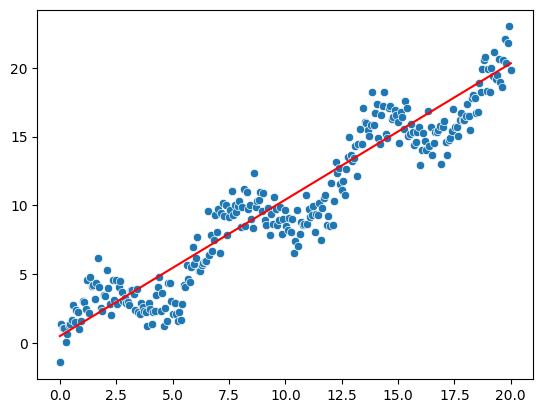

In [ ]:

model=nn.Linear(1,1)
loss_func=nn.MSELoss()
nEpochs=30
loss_acum=0
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
for epoch in tqdm(range(nEpochs),desc="Train Batch"):
    model.train()
    running_loss=0
    for inputs,labels in tqdm(training_loader,desc="Batch",leave=False):
        #print(f"{inputs}=>{labels}")
        optimizer.zero_grad()
        y_hat=model(inputs)
        loss=loss_func(y_hat,labels)
        loss.backward()
        optimizer.step()
       
with torch.no_grad():
    ypred=model(torch.tensor(X.reshape(-1,1),dtype=torch.float32)).numpy()
   
    sns.scatterplot(x=X,y=Y)
    sns.lineplot(x=X,y=ypred.ravel(),color='red')       


## Neural Training with no built in optimizers 

Train Batch: 100%|██████████| 30/30 [00:01<00:00, 20.80it/s]


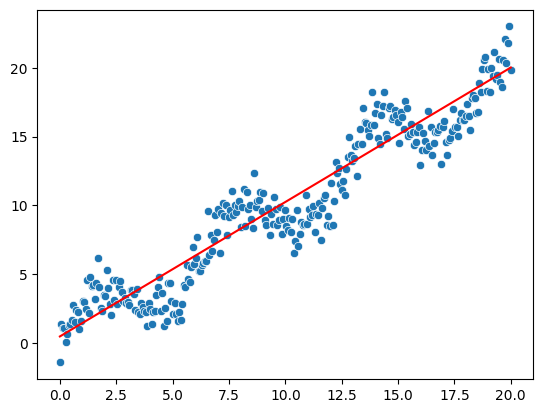

In [ ]:
model=nn.Linear(1,1)
loss_func=nn.MSELoss()
nEpochs=30
loss_acum=0
lr=0.001
for epoch in tqdm(range(nEpochs),desc="Train Batch"):
    model.train()
    running_loss=0
    for inputs,labels in tqdm(training_loader,desc="Batch",leave=False):
        #print(f"{inputs}=>{labels}")
        for param in model.parameters():
            if param.grad is not None:
                param.grad.zero_()
        y_hat=model(inputs)
        loss=loss_func(y_hat,labels)
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param-=lr*param.grad
       
with torch.no_grad():
    ypred=model(torch.tensor(X.reshape(-1,1),dtype=torch.float32)).numpy()
   
    sns.scatterplot(x=X,y=Y)
    sns.lineplot(x=X,y=ypred.ravel(),color='red')       


## Add non linear layers

Train Batch: 100%|██████████| 60/60 [00:04<00:00, 12.92it/s]


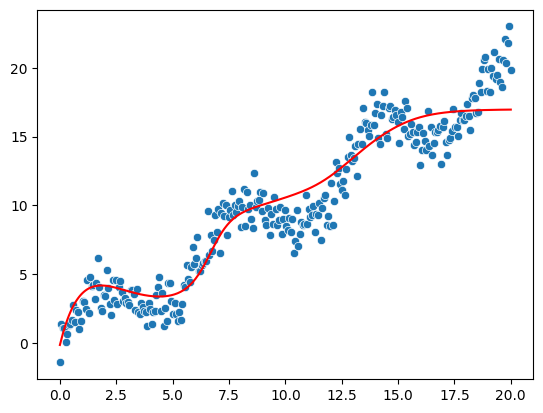

In [ ]:
model=nn.Sequential(
    nn.Linear(1,20),
    nn.Tanh(),
    nn.Linear(20,20),
    nn.Tanh(),
    nn.Linear(20,1)
)
loss_func=nn.MSELoss()
nEpochs=60
loss_acum=0
lr=0.001
for epoch in tqdm(range(nEpochs),desc="Train Batch"):
    model.train()
    running_loss=0
    for inputs,labels in tqdm(training_loader,desc="Batch",leave=False):
        #print(f"{inputs}=>{labels}")
        for param in model.parameters():
            if param.grad is not None:
                param.grad.zero_()
        y_hat=model(inputs)
        loss=loss_func(y_hat,labels)
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param-=lr*param.grad
       
with torch.no_grad():
    ypred=model(torch.tensor(X.reshape(-1,1),dtype=torch.float32)).numpy()
   
    sns.scatterplot(x=X,y=Y)
    sns.lineplot(x=X,y=ypred.ravel(),color='red')       
